In [10]:
import networkx as nx
x,import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'osmnx'

In [8]:
import contextily
import pandas as pd
import geopandas as gpd
import numpy as np

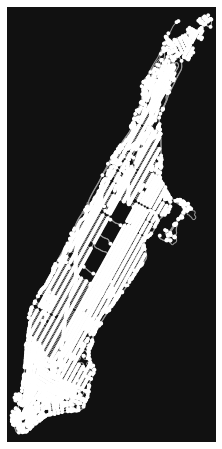

In [2]:
# import osmnx as ox
# G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
# fig, ax = ox.plot_graph(G)

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [4]:
springfield = ['Springfield, Massachusetts, USA']
graph = ox.graph_from_place(springfield, network_type='drive')
area = ox.geocode_to_gdf(springfield)
bldgs = ox.geometries_from_place(springfield, tags={'building':True}) # Retrieve buildings from the area:

In [5]:
print(type(graph))
print(type(area))
print(type(bldgs))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [148]:
bridges = pd.read_csv('../data/Bridges.csv')

In [149]:
bridges.head()

,X,Y,OBJECTID,Bridge_Name,Town,Latitude,Longitude,Facility_Carried,Structure_Material,Structure_Type,...,Year_Built,Year_Reconstructed,BridgeInspectionDate,NHS,Deck_Condition,Superstructure_condition,Substructure_Condition,Culvert_Condition,deckArea,Clearance
0,-7.912559e+06,5.240126e+06,1317750,,Wakefield,42.526161,-71.079731,ST129 NB ROTARY,Concrete,Culvert (includes frame culverts),...,1949,0,2021/08/18 00:00:00+00,False,N,N,N,N,452.084238,0.0
1,-7.910715e+06,5.237338e+06,1317751,,Wakefield,42.507700,-71.063161,HWY NEW SALEM ST,Concrete,Culvert (includes frame culverts),...,1969,0,2021/09/21 00:00:00+00,False,N,N,N,5,497.185006,0.0
2,-7.939529e+06,5.206728e+06,1317752,,Wellesley,42.304666,-71.322006,ST 9 WORCESTER ST,Concrete,Other,...,1932,0,NaN,False,?,?,?,?,0.000000,0.0
3,-7.934264e+06,5.208017e+06,1317753,,Wellesley,42.313232,-71.274708,ST 9 WORCESTER ST,Concrete,Other,...,1932,0,NaN,False,?,?,?,?,0.000000,0.0
4,-7.932033e+06,5.208232e+06,1317754,,Wellesley,42.314656,-71.254663,ST 9 WORCESTER ST,Other,Culvert (includes frame culverts),...,1932,0,2021/09/10 00:00:00+00,False,N,N,N,5,728.824335,0.0


In [6]:
len(bldgs)

54912

In [19]:
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-72.62216 42.12090, -72.62216 42.120...",42.162219,42.063736,-72.471087,-72.622158,282504661,relation,1181618,42.101876,-72.588673,"Springfield, Hampden County, Massachusetts, Un...",boundary,administrative,0.779784


In [42]:
bldgs.geometry.unique()

<GeometryArray>
[    <shapely.geometry.point.Point object at 0x7f1dc9fa3a30>,
 ...
Length: 54912, dtype: geometry

/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


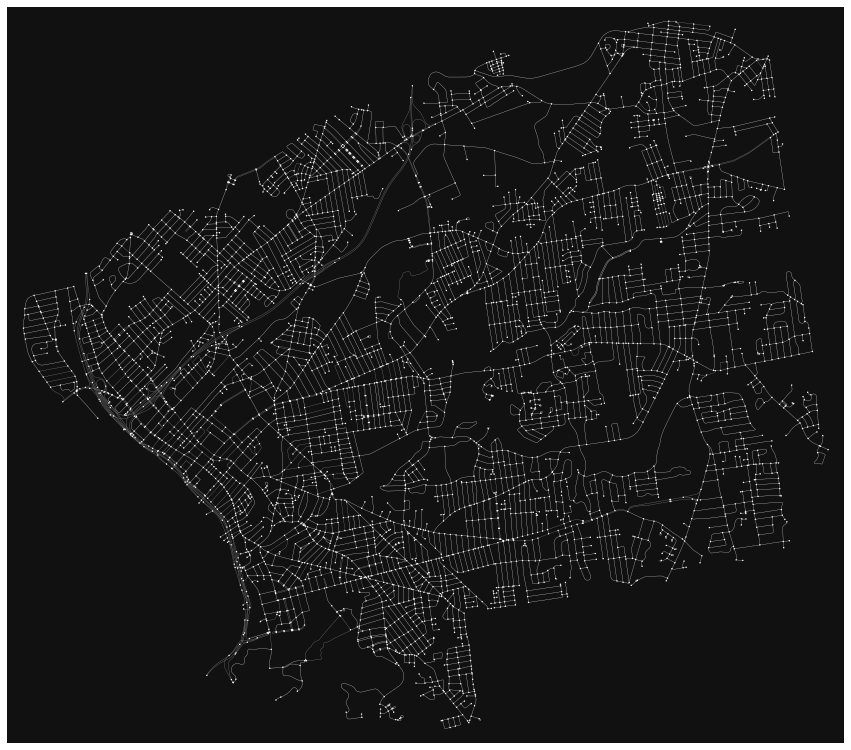

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [12]:
ox.plot_graph(graph, edge_linewidth=.25, node_size=2, figsize=(15, 15),)

In [13]:
ox.basic_stats(graph)

{'n': 4576,
 'm': 12080,
 'k_avg': 5.27972027972028,
 'edge_length_total': 1569332.7849999985,
 'edge_length_avg': 129.9116543874171,
 'streets_per_node_avg': 2.9228583916083917,
 'streets_per_node_counts': {0: 0,
  1: 622,
  2: 24,
  3: 3053,
  4: 840,
  5: 36,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13592657342657344,
  2: 0.005244755244755245,
  3: 0.6671765734265734,
  4: 0.18356643356643357,
  5: 0.007867132867132868,
  6: 0.00021853146853146853},
 'intersection_count': 3954,
 'street_length_total': 869712.121999998,
 'street_segment_count': 6656,
 'street_length_avg': 130.665883713942,
 'circuity_avg': 1.048039286491556,
 'self_loop_proportion': 0.006009615384615385}

In [159]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

In [165]:
bridges.head()

,X,Y,OBJECTID,Bridge_Name,Town,Latitude,Longitude,Facility_Carried,Structure_Material,Structure_Type,...,Year_Reconstructed,BridgeInspectionDate,NHS,Deck_Condition,Superstructure_condition,Substructure_Condition,Culvert_Condition,deckArea,Clearance,geometry
0,-7.912559e+06,5.240126e+06,1317750,,Wakefield,42.526161,-71.079731,ST129 NB ROTARY,Concrete,Culvert (includes frame culverts),...,0,2021/08/18 00:00:00+00,False,N,N,N,N,452.084238,0.0,POINT (-71.07973 42.52616)
1,-7.910715e+06,5.237338e+06,1317751,,Wakefield,42.507700,-71.063161,HWY NEW SALEM ST,Concrete,Culvert (includes frame culverts),...,0,2021/09/21 00:00:00+00,False,N,N,N,5,497.185006,0.0,POINT (-71.06316 42.50770)
2,-7.939529e+06,5.206728e+06,1317752,,Wellesley,42.304666,-71.322006,ST 9 WORCESTER ST,Concrete,Other,...,0,NaN,False,?,?,?,?,0.000000,0.0,POINT (-71.32201 42.30467)
3,-7.934264e+06,5.208017e+06,1317753,,Wellesley,42.313232,-71.274708,ST 9 WORCESTER ST,Concrete,Other,...,0,NaN,False,?,?,?,?,0.000000,0.0,POINT (-71.27471 42.31323)
4,-7.932033e+06,5.208232e+06,1317754,,Wellesley,42.314656,-71.254663,ST 9 WORCESTER ST,Other,Culvert (includes frame culverts),...,0,2021/09/10 00:00:00+00,False,N,N,N,5,728.824335,0.0,POINT (-71.25466 42.31466)


In [161]:
bridgesgpd = gpd.GeoDataFrame(
    bridges, geometry=gpd.points_from_xy(x=bridges.Longitude, y=bridges.Latitude)
)
bridgesgpd = bridgesgpd.set_crs('epsg:4326')

In [163]:
bridgesgpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [166]:
bridgesgpd_clipped.head()

,X,Y,OBJECTID,Bridge_Name,Town,Latitude,Longitude,Facility_Carried,Structure_Material,Structure_Type,...,Year_Reconstructed,BridgeInspectionDate,NHS,Deck_Condition,Superstructure_condition,Substructure_Condition,Culvert_Condition,deckArea,Clearance,geometry
5306,-8.076192e+06,5.182232e+06,1323056,,Springfield,42.141711,-72.549669,HWY ROOSEVELT AV,Steel,Stringer/Multi-beam or Girder,...,0,2021/08/18 00:00:00+00,True,8,8,7,N,6524.006106,6.04,POINT (-72.54967 42.14171)
6920,-8.076237e+06,5.182349e+06,1324670,,Springfield,42.142493,-72.550074,HWY ROOSEVELT AV,Steel,Stringer/Multi-beam or Girder,...,0,2022/02/08 00:00:00+00,True,7,4,6,N,13613.548119,4.41,POINT (-72.55007 42.14249)
2143,-8.075512e+06,5.182513e+06,1319893,NaN,Springfield,42.143583,-72.543556,HWY INDUSTRY AVE,Concrete,Culvert (includes frame culverts),...,0,2020/09/01 00:00:00+00,False,N,N,N,7,365.142492,0.00,POINT (-72.54356 42.14358)
2144,-8.075654e+06,5.182617e+06,1319894,NaN,Springfield,42.144278,-72.544833,HWY COTTAGE ST,Concrete,Culvert (includes frame culverts),...,0,2020/09/03 00:00:00+00,False,N,N,N,7,566.199695,0.00,POINT (-72.54483 42.14428)
2141,-8.075997e+06,5.182717e+06,1319891,NaN,Springfield,42.144944,-72.547917,I 291 RAMPS U & V,Concrete,Culvert (includes frame culverts),...,0,2020/11/24 00:00:00+00,True,N,N,N,6,439.921019,0.00,POINT (-72.54792 42.14494)


/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: di

(-72.62971112999999, -72.46353347, 42.058812245000006, 42.167143655)

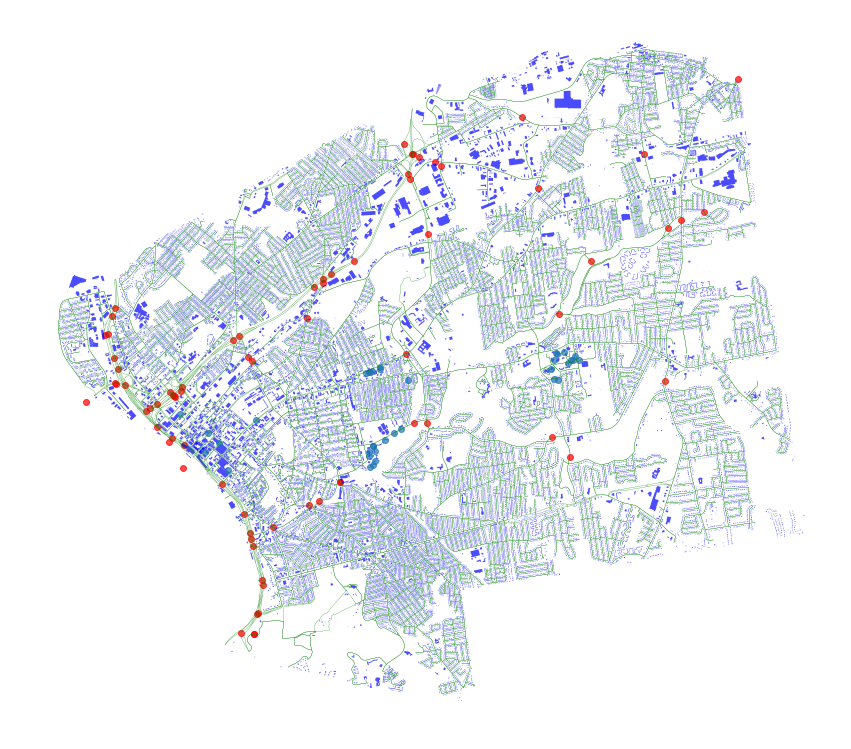

In [169]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot the footprint
area.plot(ax=ax, facecolor='white')

# Plot street edges
streets.plot(ax=ax, linewidth=.25, edgecolor='green')
#plt.scatter(bridges.Longitude,bridges.Latitude)
bridgesgpd_clipped = bridgesgpd.clip(area)
bridgesgpd_clipped.plot(ax=ax,facecolor='red', alpha=0.7)
# Plot buildings
bldgs.plot(ax=ax, facecolor='blue', alpha=0.7)
ax.axis('off')

Reference for CenPy: https://contextily.readthedocs.io/en/latest/friends_cenpy_osmnx.html

In [146]:
print(bldgs.iloc[0,0:15])

amenity                                              NaN
geometry                   POINT (-72.5528654 42.104261)
gnis:feature_id                                  1978009
old_name                                             NaN
addr:state                                            MA
building                                             yes
ele                                                   51
gnis:county_name                                 Hampden
gnis:import_uuid    57871b70-0100-4405-bb30-88b2e001a944
gnis:reviewed                                         no
name                                    Doggett Memorial
source                                     USGS Geonames
wikidata                                             NaN
parking                                              NaN
addr:housenumber                                     NaN
Name: (node, 367777410), dtype: object


In [31]:
help(cenpy.products.ACS().from_place)

Help on method from_place in module cenpy.products:

from_place(place, variables=None, level='tract', return_geometry=True, place_type=None, strict_within=True, return_bounds=False, replace_missing=True) method of cenpy.products.ACS instance
    Query the Census for the given place. 
    
    Parameters
    ---------
    place               : str
                          description of the place. Should be of the form
                          "place, state" or "place"
    place_type          : str
                          type of place to focus on, Incorporated Place, County Subdivision, or Census Designated Place. 
    variables           : list or str
                          variable or set of variables to extract from the
                          API. Can include regex columns, which will match
                          to any column in the product. So, ['P001001', '^P002']
                          will match to P001001 and any column that starts with P002.
    level         

In [172]:
demog_tract = cenpy.products.ACS(2017).from_msa('Springfield, MA', variables=['B01001','B19025'])
demog_tract = demog_tract.to_crs(streets.crs)

/home/jbo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/jbo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/jbo/.local/lib/python3.10/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return s

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

#aus_data.eval('pct_afam = B02001_003E / B02001_001E').plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
demog_tract.plot('B01001', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
#streets.plot(linewidth=.25, ax=ax, color='k')
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
ax.set_title('Springfield')
#ax.set_facecolor('k')

In [134]:
#ACS 2013-2017 does not have block-level data, so we use Decennial
#demog = cenpy.products.ACS(2017).from_state('Springfield, MA', variables=['B01001','B19025'])
demog = cenpy.products.Decennial2010().from_state('Springfield, MA', level='block', variables=['H010001'])
# B01001: population (total, and by age (gender))
# B19025: income levels

/home/jbo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


KeyError: 'Response from API is malformed. You may have submitted too many queries, formatted the request incorrectly, or experienced significant network connectivity issues. Check to make sure that your inputs, like placenames, are spelled correctly, and that your geographies match the level at which you intend to query. The original error from the Census is:\\n(API ERROR 500:Error performing query operation([]))'

In [128]:
demog['area'] = demog.geometry.area*(.001)*(.001)
demog['popden'] = demog.H010001/demog['area']

In [129]:
demog['area']

0       0.067036
1       0.000697
2       0.017334
3       0.009033
4       0.006041
          ...   
2786    0.095944
2787    0.035530
2788    0.003050
2789    0.000704
2790    0.065386
Name: area, Length: 2791, dtype: float64

In [130]:
demog = demog.to_crs(streets.crs)

In [131]:
demog.head()

,GEOID,geometry,H010001,state,county,tract,block,area,popden
0,250138007001017,"POLYGON ((-72.61467 42.11169, -72.61291 42.111...",411.0,25,013,800700,1017,0.067036,6131.078493
1,250138006003018,"POLYGON ((-72.60776 42.11450, -72.60747 42.114...",0.0,25,013,800600,3018,0.000697,0.000000
2,250138006003016,"POLYGON ((-72.60813 42.11605, -72.60812 42.116...",146.0,25,013,800600,3016,0.017334,8422.806859
3,250138008002030,"POLYGON ((-72.60783 42.11362, -72.60761 42.113...",0.0,25,013,800800,2030,0.009033,0.000000
4,250138008002048,"POLYGON ((-72.60761 42.11154, -72.60735 42.111...",0.0,25,013,800800,2048,0.006041,0.000000


In [114]:
demog.H010001

0       411.0
1         0.0
2       146.0
3         0.0
4         0.0
        ...  
2786     74.0
2787      0.0
2788      0.0
2789      0.0
2790     60.0
Name: H010001, Length: 2791, dtype: float64

/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0.5, 1.0, 'Springfield')

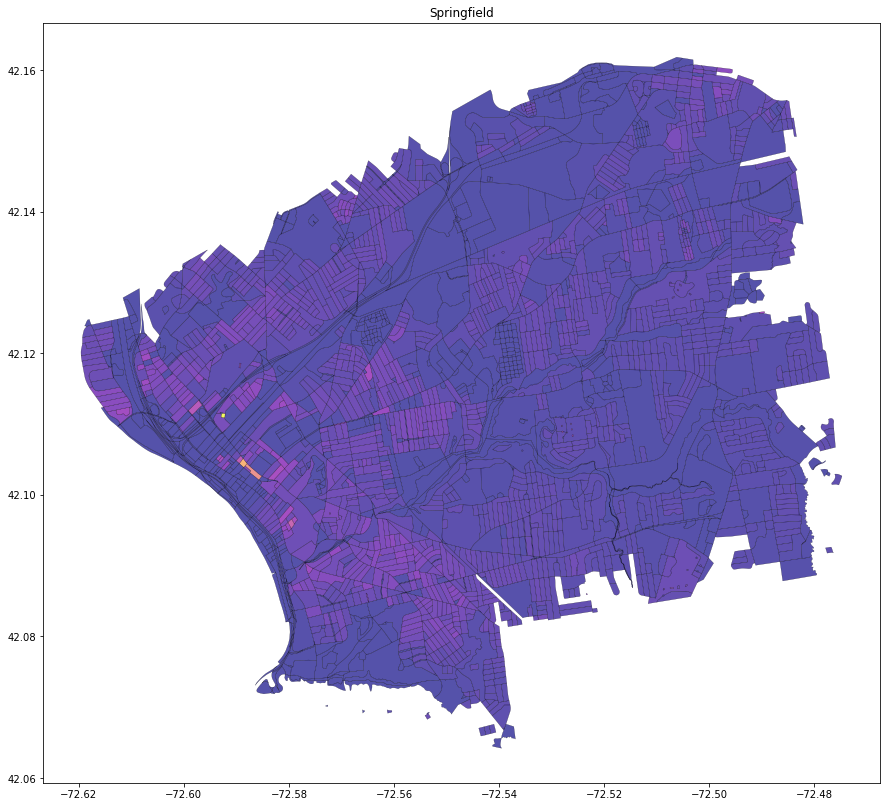

In [132]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

#aus_data.eval('pct_afam = B02001_003E / B02001_001E')\.plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
demog.plot('popden', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
#streets.plot(linewidth=.25, ax=ax, color='k')
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
ax.set_title('Springfield')
#ax.set_facecolor('k')